In [19]:
import pandas as pd

In [20]:
#dataset path

train_dr="dataset\dataset/training_set"
test_dr="dataset\dataset/test_set"

In [21]:
import tensorflow as tf 

In [22]:
train_ds=tf.keras.utils.image_dataset_from_directory(
    train_dr,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(128,128),
    batch_size=32
)

Found 8000 files belonging to 2 classes.
Using 6400 files for training.


In [23]:
val_ds=tf.keras.utils.image_dataset_from_directory(
    train_dr,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(128,128),
    batch_size=32
)

Found 8000 files belonging to 2 classes.
Using 6400 files for training.


In [24]:
test_ds=tf.keras.utils.image_dataset_from_directory(
    test_dr,
    seed=42,
    image_size=(128,128),
    batch_size=32
)

Found 2000 files belonging to 2 classes.


## scaling normalization

In [25]:
train_ds=train_ds.map(lambda x,y:(x/255.0,y))
test_ds=test_ds.map(lambda x,y:(x/255.0,y))
val_ds=val_ds.map(lambda x,y:(x/255.0,y))

In [26]:
train_ds

<_MapDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

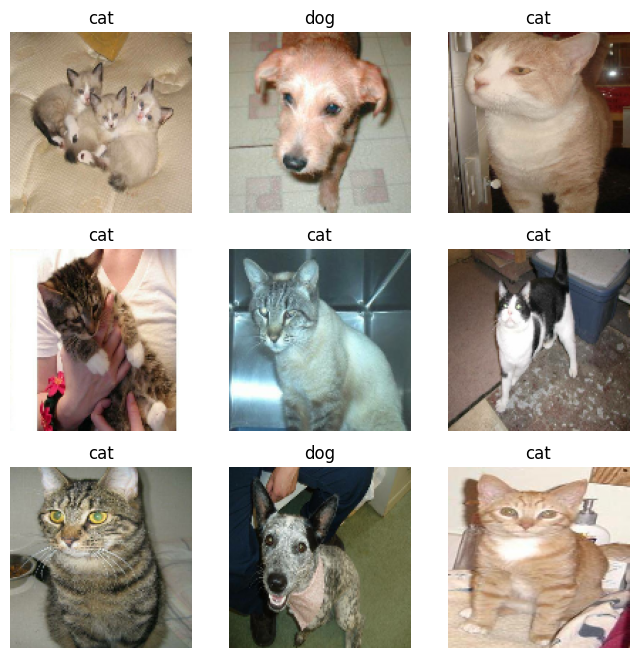

In [27]:
import matplotlib.pyplot as plt

for images,label in train_ds:
    plt.figure(figsize=(8,8))
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i])
        plt.title("dog" if label[i]==1 else "cat")
        plt.axis("off")
    plt.show()
    break

## model building

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam

In [29]:
model=Sequential([
    Convolution2D(32,(3,3),activation="relu",input_shape=(128,128,3)),
    BatchNormalization(),
    MaxPooling2D(),

    Convolution2D(64,(3,3),activation="relu"),
    BatchNormalization(),
    MaxPooling2D(),

    Convolution2D(128,(3,3),activation="relu"),
    BatchNormalization(),
    MaxPooling2D(),

    Flatten(),
    Dense(128,activation="relu"),
    BatchNormalization(),
    Dropout(0.3),

    Dense(1,activation="sigmoid")
])

c:\Users\G Raju\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
#model compile
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])


In [31]:
history=model.fit(train_ds,validation_data=val_ds,epochs=5)

Epoch 1/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 199s 970ms/step - accuracy: 0.6555 - loss: 0.7100 - val_accuracy: 0.5005 - val_loss: 1.0895
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 217s 1s/step - accuracy: 0.7589 - loss: 0.5058 - val_accuracy: 0.5519 - val_loss: 0.8731
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - accuracy: 0.8138 - loss: 0.4099 - val_accuracy: 0.7314 - val_loss: 0.5676
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 242s 963ms/step - accuracy: 0.8408 - loss: 0.3563 - val_accuracy: 0.7891 - val_loss: 0.4602
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 187s 935ms/step - accuracy: 0.8902 - loss: 0.2641 - val_accuracy: 0.9183 - val_loss: 0.1975


In [32]:
#model save
model.save("dog_cat_cnn.h5")

## new data prediction

In [34]:
from tensorflow.keras.models import load_model
model=load_model("dog_cat_cnn.h5")

print("load successfully!!")

load successfully!!


In [37]:
#image path
img_path="cat.jpeg"

#load img and covert
img=tf.keras.utils.load_img(img_path,target_size=(129,128))
img=tf.keras.utils.img_to_array(img)
img=tf.expand_dims(img,axis=0)  #(1,128,128,3)
img=img/255.0  #normalization

In [38]:
prediction=model.predict(img)
#cat=0
#dog=1

pred_label="dog" if prediction[0][0]>0.5 else "cat"

print("prediction value:",prediction)
print("predicted label",pred_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
prediction value: [[0.34239113]]
predicted label cat
